# Introdução a Processamento de Imagens

Imagem é um termo que provem do latim imāgo e que se refere à figura, representação, semelhança ou aparência de algo.

No meio digital, imagens são usadas principalmente no marketing e na divulgação de diferentes assuntos.

Para que estas imagens possam ser usadas nos 

O que pode-se fazer com Python?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Imagem Simples')

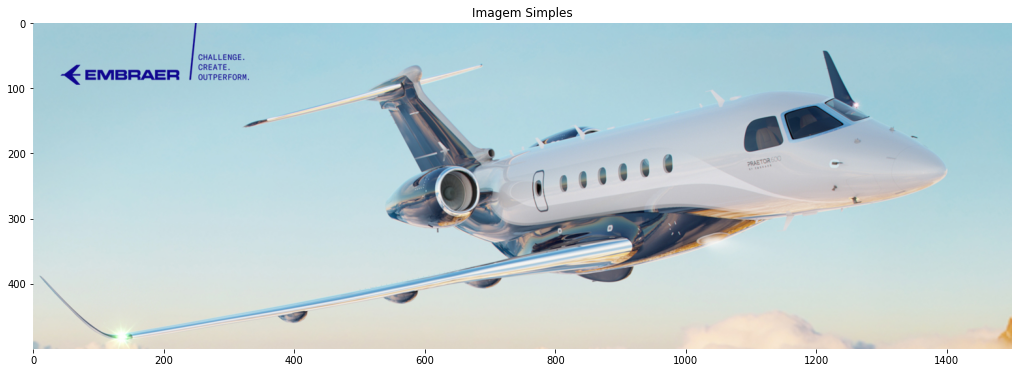

In [ ]:
img = plt.imread('Executiva[300].png', 0)
plt.figure(figsize = (20,6))
plt.imshow(img)
plt.box(False)
plt.title("Imagem Simples")

In [ ]:
type(img)

numpy.ndarray

Como podemos ver acima, a imagem foi armazenada numa matriz 'ndarray', se printarmos ela não poderemos ver todos os elementos pelo seu extenso tamanho.
Para demonstrar isso, o print usa das reticências, informando a continuidade da matriz.

In [ ]:
print(img)

[[[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [149 198 213]]

 [[169 205 219]
  [165 201 215]
  [164 202 215]
  ...
  [149 198 213]
  [149 198 213]
  [147 199 213]]

 [[169 205 219]
  [164 202 215]
  [164 202 215]
  ...
  [146 198 212]
  [147 199 213]
  [146 198 212]]

 ...

 [[171 190 197]
  [166 186 193]
  [167 188 193]
  ...
  [230 193 148]
  [230 193 148]
  [231 194 149]]

 [[169 189 196]
  [165 185 192]
  [165 186 191]
  ...
  [232 195 151]
  [233 196 151]
  [231 197 151]]

 [[168 188 195]
  [162 185 191]
  [165 186 191]
  ...
  [232 198 152]
  [232 198 152]
  [232 198 152]]]


In [ ]:
#verificando as dimensões dessa matriz
img.shape

(500, 1500, 3)

Note a multidimensionalidade da matriz, contendo 500 linhas e 1500 colunas, além também das 3 camadas representando o *Padrão RGB* de cores, isto é, a intensidade de que cada pixel tem de vermelho (Red), verde (Green) e azul (Blue), sendo cada camada é estabelecida por sua própria matriz.

# Relação com Álgebra Linear
Considerando a interpretação de imagens como matrizes, a aplicaçação de operações matriciais também se torna válida. Abaixo, apresentamos alguns exemplos. 


## Matriz inversa
Seja:
\begin{align}
  M = \begin{bmatrix} 
    a & b \\
    c & d \\
  \end{bmatrix}
\end{align}

Sua matriz inversa ($M^{-1}$), se existir, seria o equivalente a:
\begin{align}
  M^{-1} = \frac{1}{ad-bc} 
  \begin{bmatrix}
    d & -b \\
    -c & a \\
  \end{bmatrix}
\end{align}

\

Obs: Uma matriz $M$ só é invertível caso seu determinante seja não-nulo ($det(M)$ $\neq 0$).

Exemplo:

Considere a seguinte inversão matricial:
\begin{align}
  M = \begin{bmatrix}
    6 & 1 \\
    5 & 2 \\
  \end{bmatrix}
\end{align}

\

\begin{align}
  M^{-1} = \frac{1}{7} 
    \begin{bmatrix}
    2 & -1 \\
    -5 & 6 \\
  \end{bmatrix}
\end{align}

\

\begin{align}
  M^{-1} = 
    \begin{bmatrix}
    2/7 & -1/7 \\
    -5/7 & 6/7 \\
  \end{bmatrix}
\end{align}

Numa imagem, cada pixel tem sua cor invertida, simplesmente invertendo sua matriz correspondente.

Text(0.5, 1.0, 'Imagem com Suas Cores Invertidas')

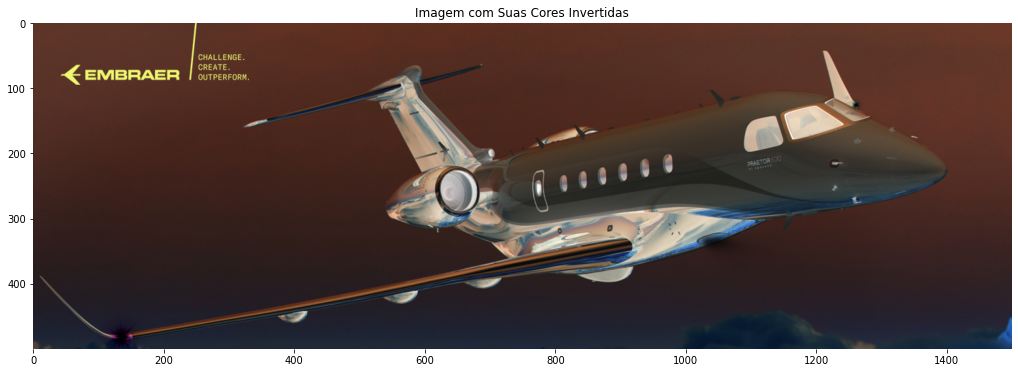

In [ ]:
img_inv = np.invert(img)

# definindo as dimensões da do gráfico que sustentará a imagem advinda de uma matriz
plt.figure(figsize = (20,6))
# plotando a imagemInversa
plt.imshow(img_inv)
# removendo a moldura o gráfico
plt.box(False)
# adicionando o título ao gráfico
plt.title("Imagem com Suas Cores Invertidas")

Para clareza do que foi feito, podemos reiverter a matriz que foi invertida, conseguindo assim, reobter a matriz original.

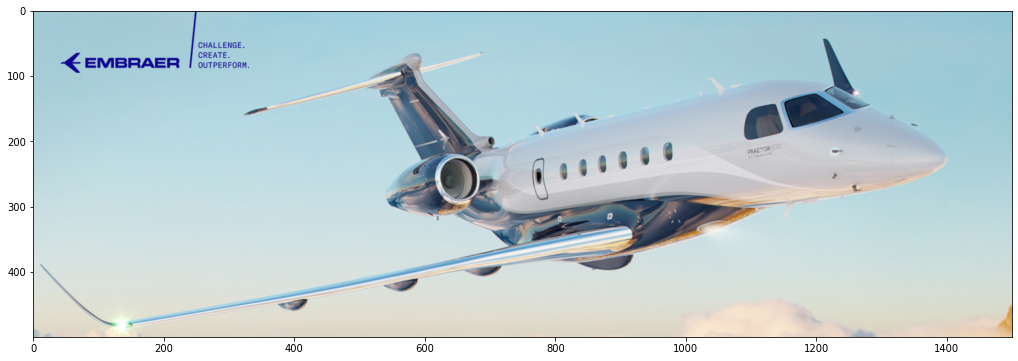

In [ ]:
img_og = np.invert(img_inv)
plt.figure(figsize = (20,6))
plt.imshow(img_og)

## Matriz Transposta
A transposição de uma matriz troca entre si suas linhas e colunas. A transposta de uma matriz $M_{3 \ 2}$ é definida por $M^t_{2 \ 3}$.

Acima pode-se perceber que houve a troca de '$n$' por '$m$' na matriz transposta. Ou seja, os elementos dispostas nas linhas de uma matriz foram organizados na coluna da matriz originada após as substituições.


Exemplo:

Considere a seguinte matriz:
\begin{align}
  M = \begin{bmatrix}
    a & b & c\\ 
    d & e & f\\ 
  \end{bmatrix} 
\end{align}

Sua matriz transposta seria:
\begin{align}
  M^t = \begin{bmatrix}
    a & d \\ 
    b & e \\ 
    c & f \\ 
  \end{bmatrix} 
\end{align}

Numa imagem, isso seria equivalente a rotacionar a matriz 90° para esquerda.

In [ ]:
img_tr = np.transpose(img)

Só isso não é suficientemente, dado que não foi invertido somente as linhas e as colunas, mas também a posição delas entre as camadas. 
Obs: Mais sobre as camadas será falado a seguir.

In [ ]:
img_tr = np.swapaxes(img_tr, 0, 1)
img_tr = np.swapaxes(img_tr, 1, 2)

Text(0.5, 0, 'Matriz Transposta da Imagem')

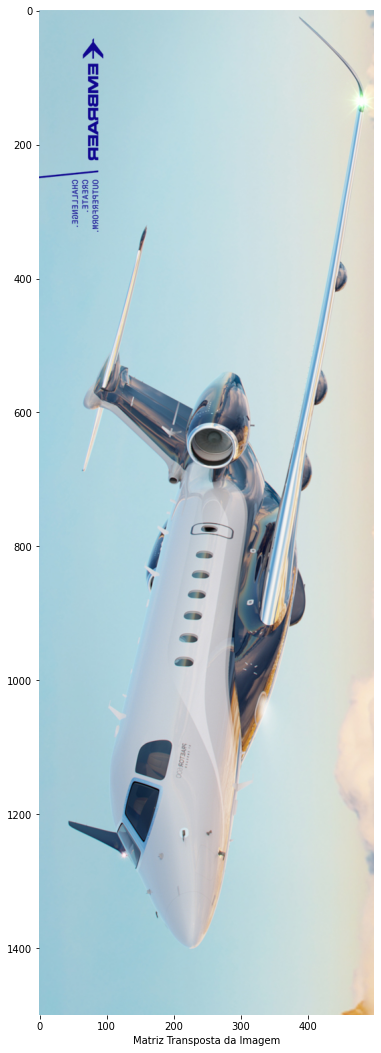

In [ ]:
plt.figure(figsize = (6,20))
plt.imshow(img_tr)
plt.box(False)
plt.xlabel("Matriz Transposta da Imagem")

## Matriz de Rotação

Uma matriz de rotação, como o próprio nome já diz, é uma matriz que roda um vetor no espaço em que está contido.
Aqui nos limitaremos a rotação no $\mathbb{R}^2$.

### Rotação no $\mathbb{R}^2$
A rotação é a transformação $R: \mathbb{R}^2 \to \mathbb{R}^2$, tal que $R(\vec v) = \vec u$, sendo $\vec u$ o vetor $\vec v$ rotacionado $\theta$ graus.

Exemplo: 

Aqui, usaremos uma função pronta pertencente a biblioteca *scipy* chamada **ndimage**. A mesma é reponsável por rotacionar uma matriz de entrada no plano definido pelos eixos (axes) dados como parâmetro.

In [1]:
# importando a biblioteca scipy do python
from scipy import ndimage

In [ ]:
# a variável img_rt_90 recebe a matriz da variável img após sofrer uma transformação linear
# usando uma matriz de rotação. O ângulo é 90°
img_rt_90 = ndimage.rotate(img, 90)

plt.figure(figsize = (6,20))
plt.imshow(img_rt_90)
plt.box(False)
plt.ylabel("Imagem Rotacionada 90°")